# MI 220 Basic Stroke EDA
This notebook aims to explore some basic attributes of the __[Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)__
uploaded and curated by user FEDESORIANO on Kaggle. 

Author: Marcelino C. Franco III

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set_style("dark")

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = df.drop('id', axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


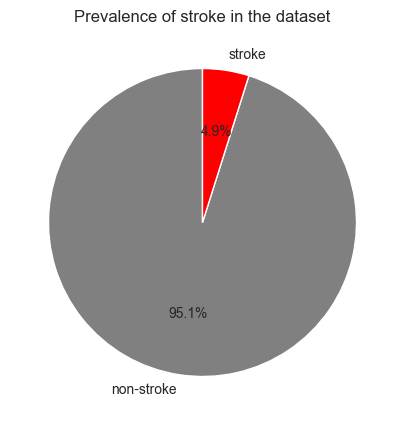

In [4]:
sizes = df['stroke'].value_counts(sort = True)
 
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=["non-stroke", "stroke"], colors=["gray", "red"], autopct='%1.1f%%', startangle=90)
plt.title('Prevalence of stroke in the dataset')
plt.show()

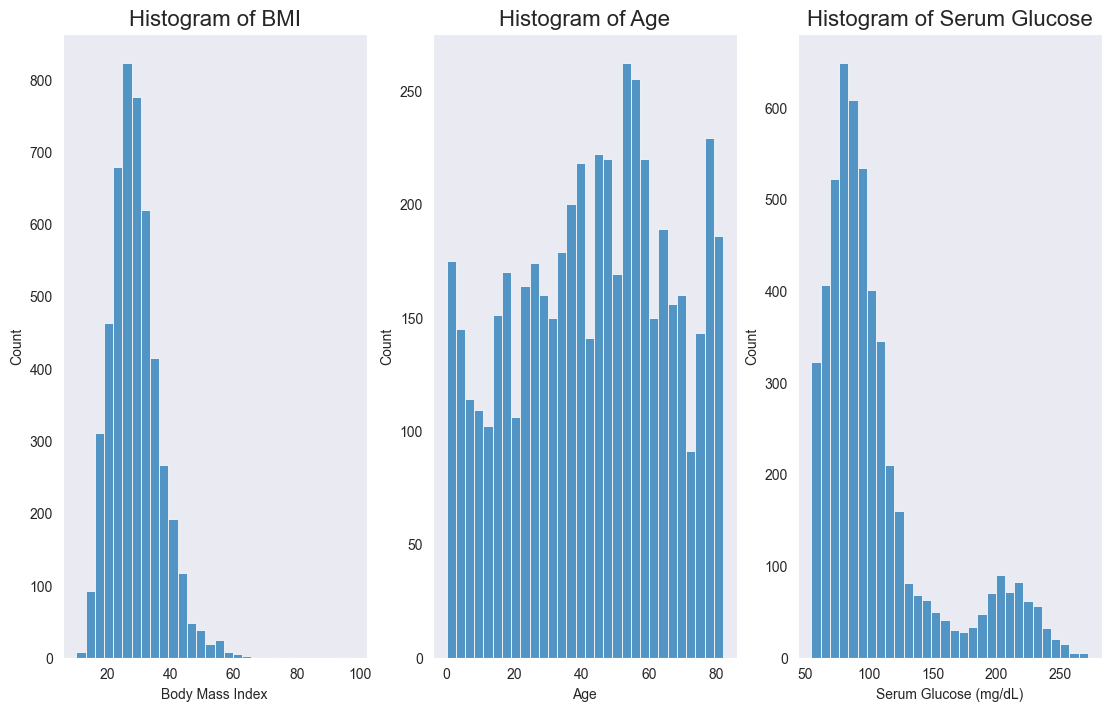

In [5]:
def hist_plot(col, bins=30, title="", xlabel="", ax=None):
    sns.histplot(col, bins=bins, ax=ax)
    ax.set_title(f"Histogram of {title}", fontsize=16)
    ax.set_xlabel(xlabel)
    
fig, axes = plt.subplots(1, 3, figsize=(11,7), constrained_layout=True)
hist_plot(df.bmi, title="BMI", xlabel="Body Mass Index", ax=axes[0])
hist_plot(df.age, title="Age", xlabel="Age", ax=axes[1])
hist_plot(df.avg_glucose_level, title="Serum Glucose", xlabel="Serum Glucose (mg/dL)", ax=axes[2])
plt.show()

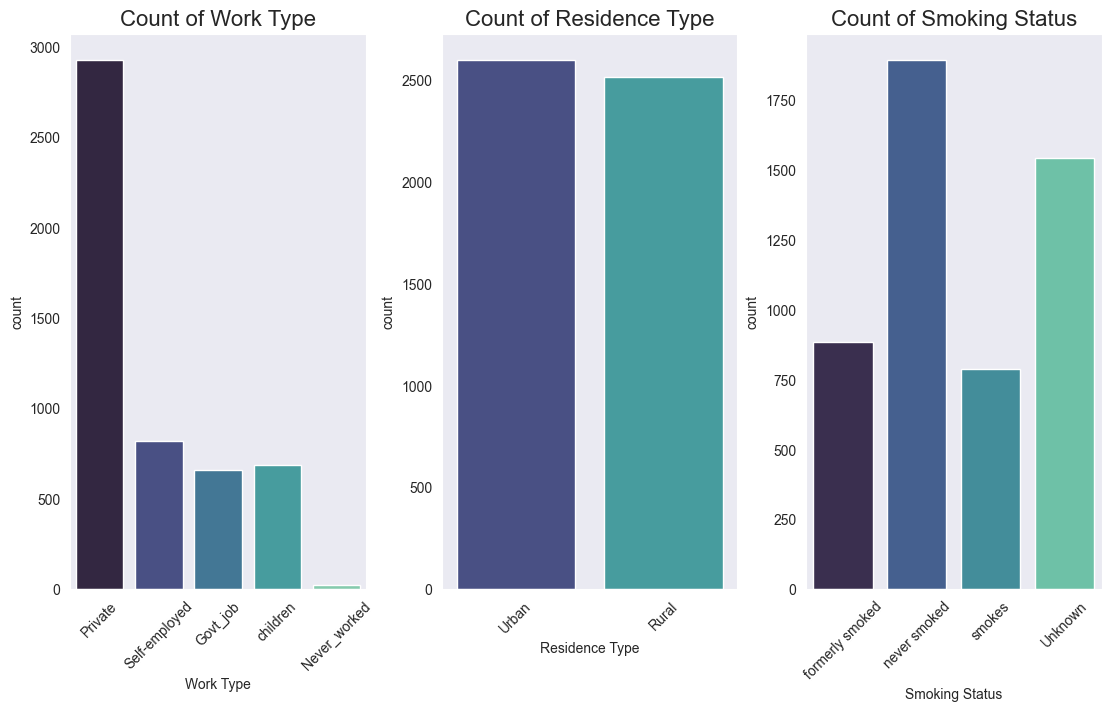

In [6]:
def count_plot(col, title="", xlabel="", ax=None):
    sns.countplot(data=df, x=col, palette="mako", ax=ax)
    ax.set_title(f"Count of {title}", fontsize=16)
    ax.set_xlabel(xlabel)
    xticks = ax.get_xticklabels()
    ax.set_xticklabels(labels=xticks, rotation=45)
    
fig, axes = plt.subplots(1, 3, figsize=(11,7), constrained_layout=True)
count_plot("work_type", title="Work Type", xlabel="Work Type", ax=axes[0])
count_plot("Residence_type", title="Residence Type", xlabel="Residence Type", ax=axes[1])
count_plot("smoking_status", title="Smoking Status", xlabel="Smoking Status", ax=axes[2])
plt.show()

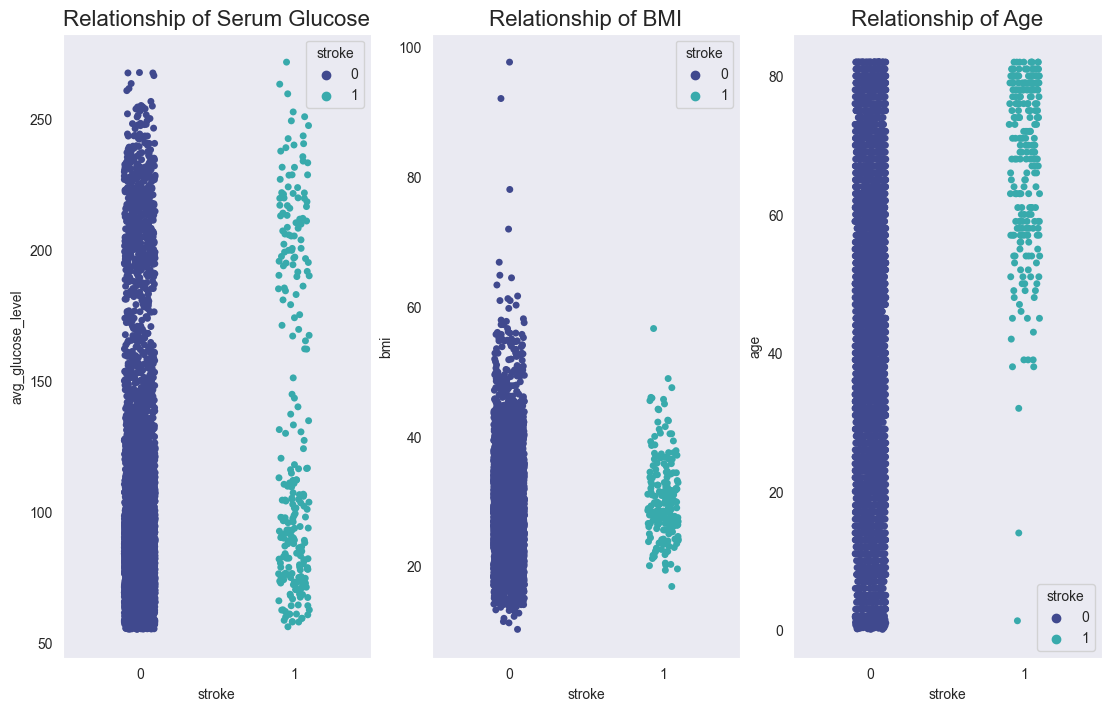

In [7]:
def plot_strip(x, y, hue, title="", ax=None):
    sns.stripplot(x=x, y=y, hue=hue, palette="mako", data=df, ax=ax)
    ax.set_title(f"Relationship of {title}", fontsize=16)

fig, axes = plt.subplots(1, 3, figsize=(11,7), constrained_layout=True)
plot_strip(x="stroke", y="avg_glucose_level", hue="stroke", title="Serum Glucose", ax=axes[0])
plot_strip(x="stroke", y="bmi", hue="stroke", title="BMI", ax=axes[1])
plot_strip(x="stroke", y="age", hue="stroke", title="Age", ax=axes[2])
plt.show()

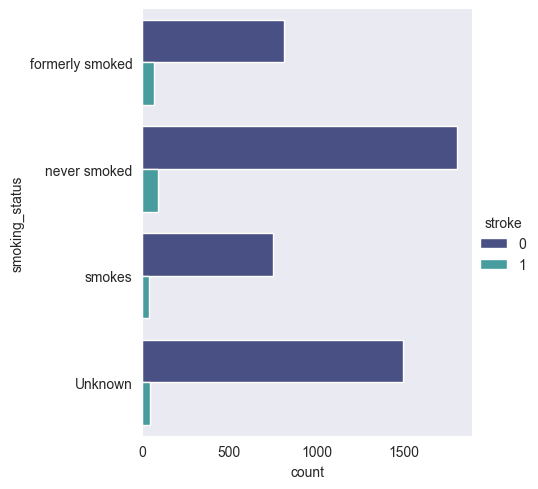

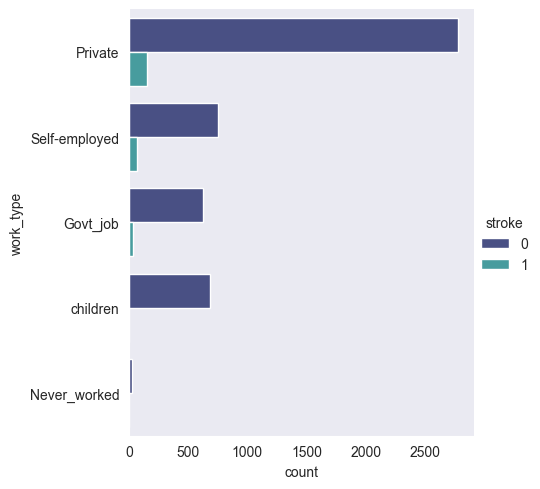

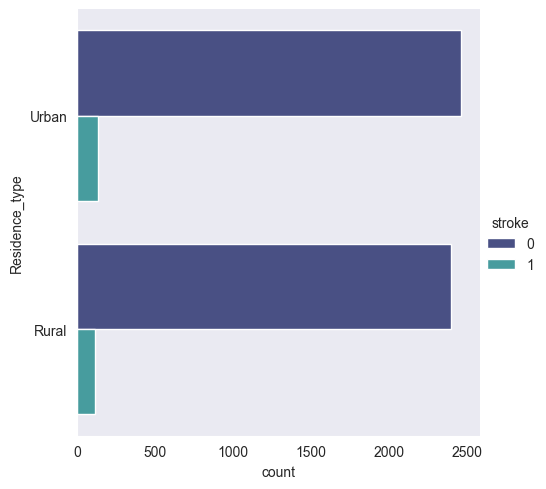

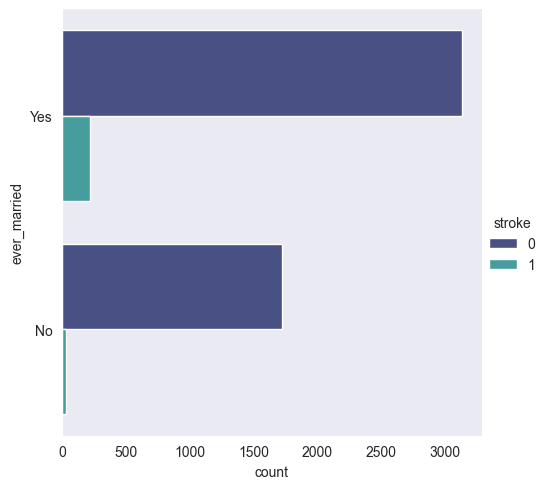

In [8]:
for y in ("smoking_status", "work_type", "Residence_type", "ever_married"):
    sns.catplot(y=y, hue="stroke", kind="count", palette="mako", data=df)

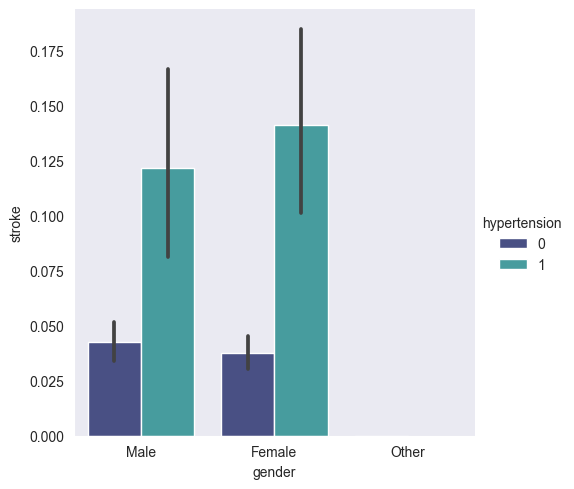

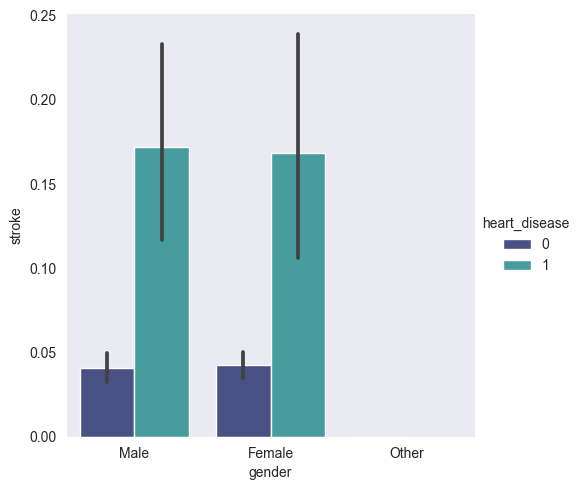

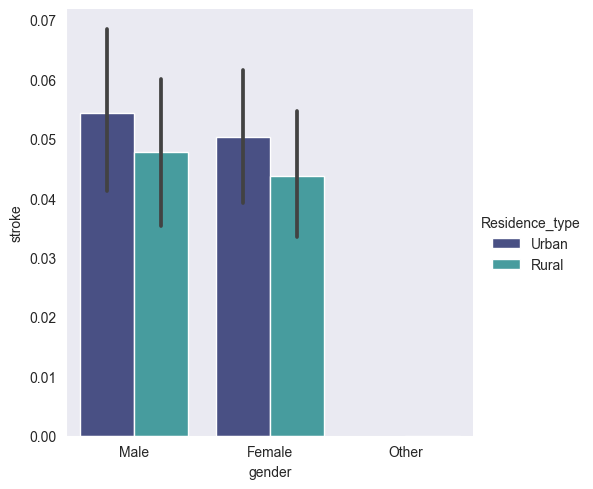

In [9]:
for hue in ("hypertension", "heart_disease", "Residence_type"):
    sns.catplot(x="gender", y="stroke", hue=hue, palette="mako", kind="bar", data=df)

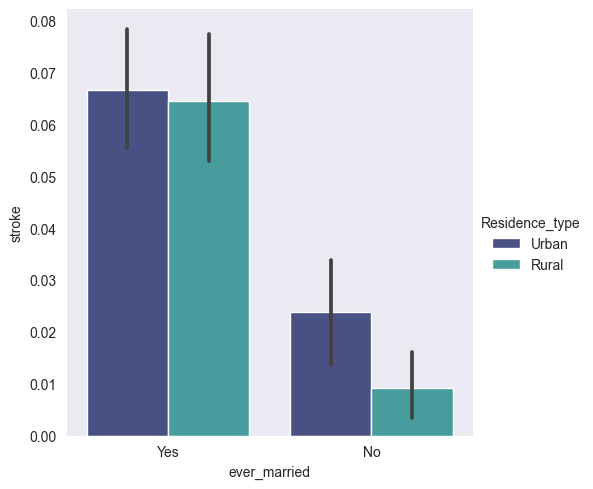

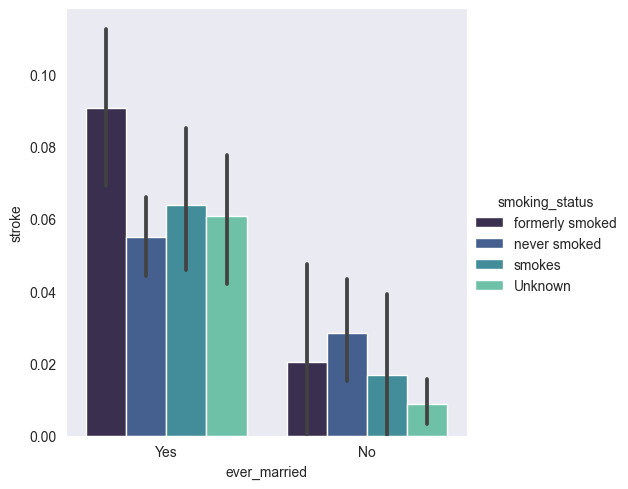

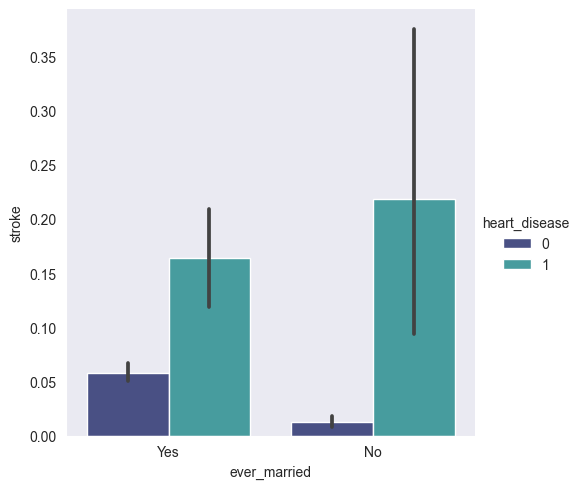

In [10]:
for hue in ("Residence_type", "smoking_status", "heart_disease"):
    sns.catplot(x="ever_married", y="stroke", hue=hue, palette="mako", kind="bar", data=df)

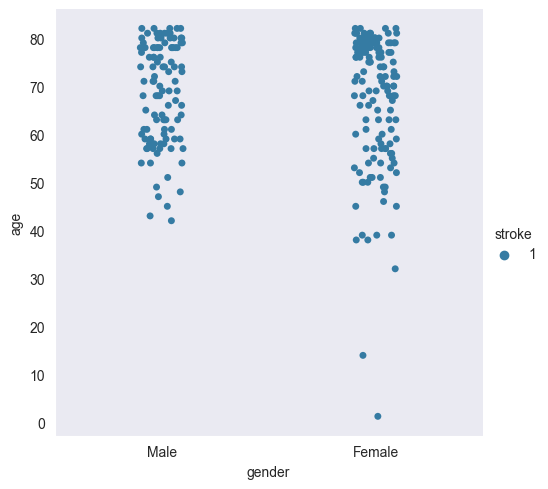

In [11]:
temp_df = df[df["stroke"] == 1] 
sns.catplot(x="gender", y="age", hue="stroke", palette="mako", kind="strip", data=temp_df)

### Some Interesting Insights

1. Stroke seems linked to:
    * Marital status
    * Heart disease
    * High BMI
2. Stroke may not be linked to:
    * $\color{red}{\text{Sex}}$
    * $\color{red}{\text{Type of residence}}$
    * $\color{red}{\text{Smoking}}$
    * $\color{red}{\text{Elevated serum glucose}}$

Are some of these inaccurate due to problems with our dataset? **Probably**
    
### Things to Consider

1. Is our dataset good enough to make predictions?
2. Is our dataset a good representation of the vulnerable population?
3. What other features would we want to consider?

### Further Reading
* __[Causes and Risk Factors for Stroke](https://www.nhlbi.nih.gov/health/stroke/causes)__
* __[Predicting Risk of Stroke From Lab Tests Using Machine Learning Algorithms: Development and Evaluation of Prediction Models](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8686476/)__
* __[Early Stroke Prediction Methods for Prevention of Strokes](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9017592/)__